## Helical Axis Model

$$ R = R_0 + \rho\cos\theta+ \epsilon\cos(\theta+N\varphi) + \delta\cos(N\varphi) $$
$$ \phi = -\varphi $$
$$ Z = -\rho\sin\theta + \epsilon\sin(\theta+N\varphi) + \delta\sin(N\varphi) $$

In [19]:
import lec.toroidalField
import lec.geometry

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

In [20]:
r0 = 2 
rho = 0.4
epsilon = 0.15
delta = 0.4
nfp = 4

funR = lambda thetaArr, phiArr: r0 + rho*np.cos(thetaArr) + epsilon*np.cos(thetaArr+nfp*phiArr) + delta*np.cos(nfp*phiArr) 
funZ = lambda thetaArr, phiArr: -rho*np.sin(thetaArr) + epsilon*np.sin(thetaArr+nfp*phiArr) + delta*np.sin(nfp*phiArr)

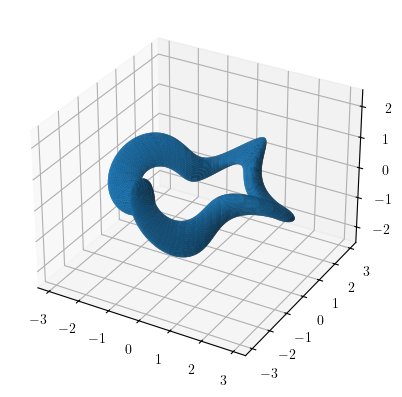

In [21]:
_thetaArr = np.linspace(0, 2*np.pi, 100)
_phiArr = np.linspace(0, 2*np.pi, 200)
thetaArr, phiArr = np.meshgrid(_thetaArr, _phiArr)
rArr = funR(thetaArr, -phiArr)
xArr = rArr * np.cos(phiArr)
yArr = rArr * np.sin(phiArr)
zArr = funZ(thetaArr, -phiArr)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xArr, yArr, zArr)
_ = plt.axis("equal")

In [22]:
sampleNumsTheta, sampleNumsPhi = 5, 5
deltaTheta = 2*np.pi / (2*sampleNumsTheta+1)
deltaPhi = 2*np.pi / nfp / (2*sampleNumsPhi+1)
sampleTheta, samplePhi = np.arange(2*sampleNumsTheta+1)*deltaTheta, np.arange(2*sampleNumsPhi+1)*deltaPhi
gridSamplePhi, gridSampleTheta = np.meshgrid(samplePhi, sampleTheta)
sampleR = funR(gridSampleTheta, -gridSamplePhi)
sampleZ = funZ(gridSampleTheta, -gridSamplePhi)

fieldR = lec.toroidalField.fftToroidalField(sampleR, nfp=nfp)
fieldZ = lec.toroidalField.fftToroidalField(sampleZ, nfp=nfp)

surf = lec.geometry.Surface(fieldR, fieldZ)

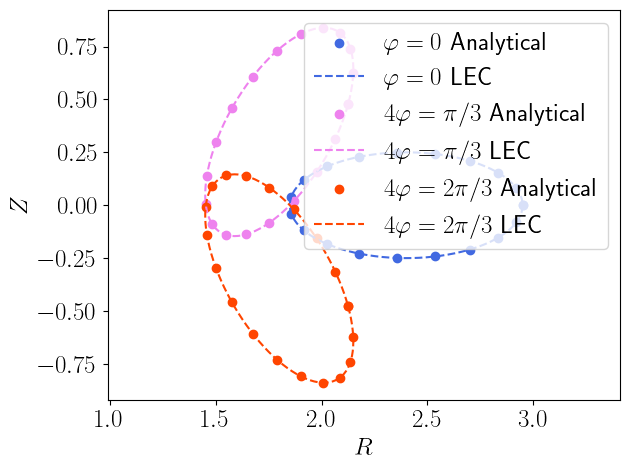

In [23]:
fig, ax = plt.subplots()
ax.scatter(funR(np.linspace(0,2*np.pi,20),np.ones(20)*0), funZ(np.linspace(0,2*np.pi,20),np.ones(20)*0), c = "royalblue", label= r"$\varphi=0$"+" Analytical")
ax.plot(
    surf.r.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*0).flatten(), 
    surf.z.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*0).flatten(), 
    c = "royalblue", 
    ls = "--", 
    label = r"$\varphi=0$"+" LEC"
)
ax.scatter(funR(np.linspace(0,2*np.pi,20),np.ones(20)*np.pi/2/3), funZ(np.linspace(0,2*np.pi,20),np.ones(20)*np.pi/2/3), c = "violet", label= r"$4\varphi=\pi/3$"+" Analytical")
ax.plot(
    surf.r.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*np.pi/2/3).flatten(), 
    surf.z.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*np.pi/2/3).flatten(), 
    c = "violet", 
    ls = "--", 
    label = r"$4\varphi=\pi/3$"+" LEC"
)
ax.scatter(funR(np.linspace(0,2*np.pi,20),np.ones(20)*np.pi/3), funZ(np.linspace(0,2*np.pi,20),np.ones(20)*np.pi/3), c = "orangered", label= r"$4\varphi=2\pi/3$"+" Analytical")
ax.plot(
    surf.r.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*np.pi/3).flatten(), 
    surf.z.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*np.pi/3).flatten(), 
    c = "orangered", 
    ls = "--", 
    label = r"$4\varphi=2\pi/3$"+" LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$R$", fontsize=18)
ax.set_ylabel(r"$Z$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
_ = plt.axis("equal")
fig.tight_layout()

$$ g_{\theta\theta} = \rho^2 + \epsilon^2 + 2\rho\epsilon(\sin\theta\sin(\theta+N\varphi)-\cos\theta\cos(\theta+N\varphi)) $$

In [24]:
def getGthetatheta(theta: np.ndarray, phi: np.ndarray) -> np.ndarray:
    return rho*rho + epsilon*epsilon + 2*rho*epsilon*(
        np.sin(theta)*np.sin(theta+nfp*phi) - np.cos(theta)*np.cos(theta+nfp*phi)
    )

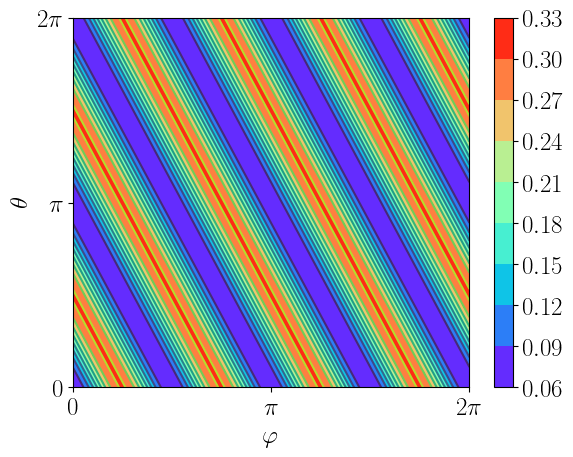

In [25]:
basisTheta, basisVarPhi = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
gridBasisVarPhi, gridBasisTheta = np.meshgrid(basisVarPhi, basisTheta)

fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, getGthetatheta(gridBasisTheta,gridBasisVarPhi)
)
surf.mertic[0].plot_plt(fig=fig, ax=ax, onePeriod=False)

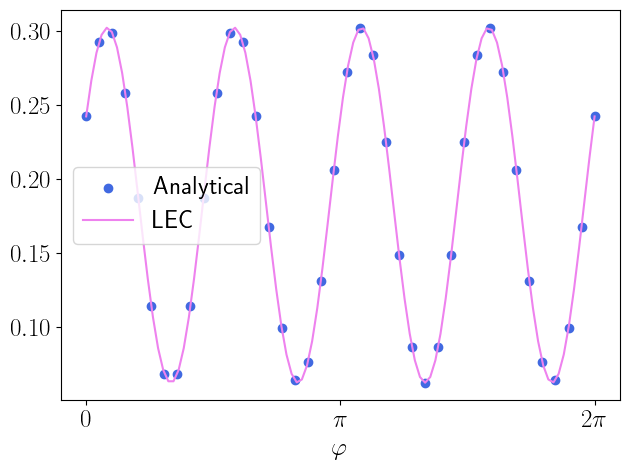

In [26]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,40), getGthetatheta(np.ones(40)*theta, np.linspace(0,2*np.pi,40)), 
    color="royalblue", label="Analytical"
)
ax.plot(
    np.linspace(0,2*np.pi,100), surf.mertic[0].getValue(np.ones(100)*theta, np.linspace(0,2*np.pi,100)).flatten(), 
    color="violet", label="LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()

$$ g_{\theta\varphi} = N(\rho\sin\theta + \epsilon\sin(\theta+N\varphi)) (\epsilon\sin(\theta+N\varphi) + \delta\sin(N\varphi)) $$
$$ N(\rho\cos\theta + \epsilon\cos(\theta+N\varphi)) (\epsilon\cos(\theta+N\varphi) + \delta\cos(N\varphi)) $$

In [27]:
def getGthetaphi(theta: np.ndarray, phi: np.ndarray) -> np.ndarray:
    return nfp * (
        (rho*np.sin(theta)+epsilon*np.sin(theta+nfp*phi)) * (epsilon*np.sin(theta+nfp*phi)+delta*np.sin(nfp*phi)) +
        (-rho*np.cos(theta)+epsilon*np.cos(theta+nfp*phi)) * (epsilon*np.cos(theta+nfp*phi)+delta*np.cos(nfp*phi)) 
    )

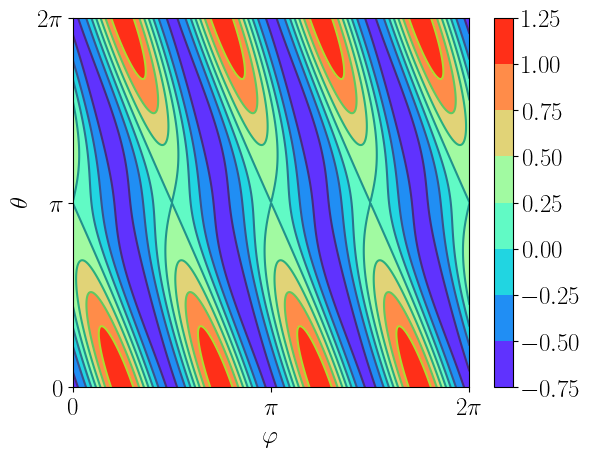

In [28]:
basisTheta, basisVarPhi = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
gridBasisVarPhi, gridBasisTheta = np.meshgrid(basisVarPhi, basisTheta)

fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, getGthetaphi(gridBasisTheta,gridBasisVarPhi)
)
surf.mertic[1].plot_plt(fig=fig, ax=ax, onePeriod=False)

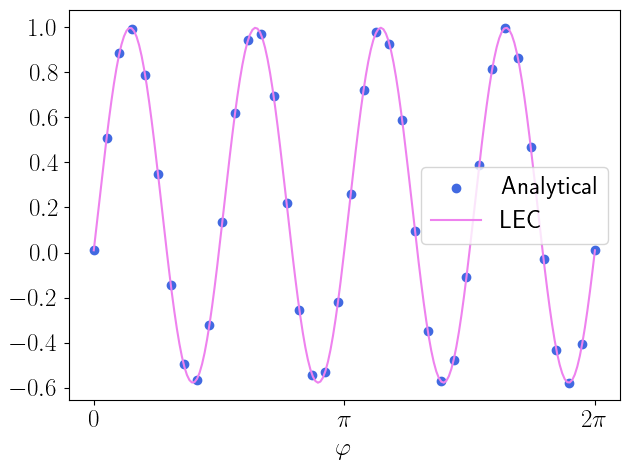

In [29]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,40), getGthetaphi(np.ones(40)*theta, np.linspace(0,2*np.pi,40)), 
    color="royalblue", label="Analytical"
)
ax.plot(
    np.linspace(0,2*np.pi,200), surf.mertic[1].getValue(np.ones(200)*theta, np.linspace(0,2*np.pi,200)).flatten(), 
    color="violet", label="LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()

In [30]:
def getGphiphi(theta: np.ndarray, phi: np.ndarray) -> np.ndarray:
    return (
        np.power(epsilon*nfp*np.sin(theta+nfp*phi)+delta*nfp*np.sin(nfp*phi), 2) +
        np.power(funR(theta, phi), 2) + 
        np.power((epsilon*nfp*np.cos(theta+nfp*phi)+delta*nfp*np.cos(nfp*phi)), 2)
    )

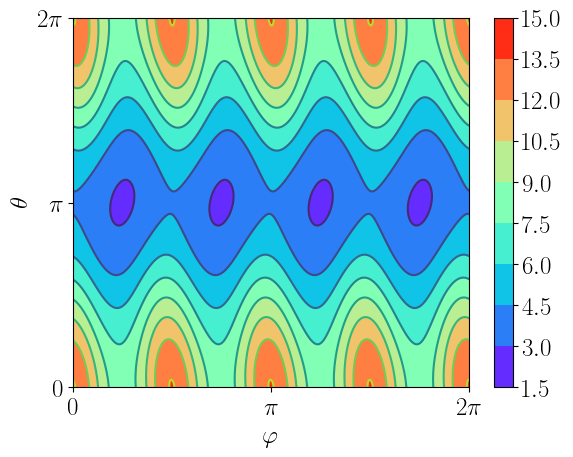

In [31]:
basisTheta, basisVarPhi = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
gridBasisVarPhi, gridBasisTheta = np.meshgrid(basisVarPhi, basisTheta)

fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, getGphiphi(gridBasisTheta,gridBasisVarPhi)
)
surf.mertic[2].plot_plt(fig=fig, ax=ax, onePeriod=False)

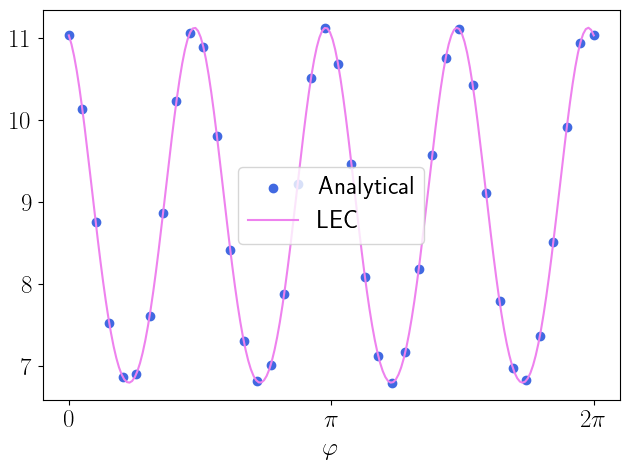

In [32]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,40), getGphiphi(np.ones(40)*theta, np.linspace(0,2*np.pi,40)), 
    color="royalblue", label="Analytical"
)
ax.plot(
    np.linspace(0,2*np.pi,200), surf.mertic[2].getValue(np.ones(200)*theta, np.linspace(0,2*np.pi,200)).flatten(), 
    color="violet", label="LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()